<a href="https://colab.research.google.com/github/dmarinere/NikeCampaign/blob/master/Nike_Campaign_Contd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
## Importing the libraries:
import os, sys
import matplotlib.font_manager as font_manager
import cachetools.func

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_infl = pd.read_csv("/content/drive/My Drive/Colab Notebooks/all_influencers_tweets.csv")
df_gov = pd.read_csv("/content/drive/My Drive/Colab Notebooks/all_government_tweets.csv")

In [ ]:
#i would start would creating a new dataframe that has no duplicate author so i could get some data
df_new_infl= df_infl.drop_duplicates(subset ="original_author",)
df_new_gov = df_gov.drop_duplicates(subset ="original_author")
df_new_gov.reset_index(drop=True, inplace=True)
df_new_infl.reset_index(drop=True, inplace=True)

In [ ]:
#i started with using the assumption that we made about less than 5 tweets
df_infl = df_infl[df_infl['original_author'].map(df_infl['original_author'].value_counts()) > 5]
df_gov = df_gov[df_gov['original_author'].map(df_gov['original_author'].value_counts()) > 5]

In [ ]:
#i converted some columns from object to int so we can work with them easily
df_new_infl = df_new_infl.astype({'favorite_count': 'int64', 'retweet_count': 'int64','following': 'int64' })
df_infl = df_infl.astype({'favorite_count': 'int64', 'retweet_count': 'int64','following': 'int64' })

In [ ]:
#i would also drop all influencer that have less than 10,000 followers, my assumption is they are not useful in this campaign 
df_infl = df_infl[df_infl['followers'] > 10000]

In [ ]:
# i would start with getting the reach score for all the influencers and leaders 
df_new_gov['reach'] = df_new_gov.apply(lambda x: x['followers'] - x['following'], axis=1)
df_new_infl['reach'] = df_new_infl.apply(lambda x: x['followers'] - x['following'], axis=1)

In [ ]:
df_new_gov

,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,name,following,followers,hashtags,mention,place_coord_boundaries,location,reach
0,Mon Jun 01 09:04:35 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","""on my windhorse, at sunrise, i come riding"". ...",en,14,7,p,paolo i.,284,34861,NaN,NaN,NaN,trailing away. offshore,34577
1,Fri Jul 17 08:18:45 +0000 2020,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",@ElderlyBadger I read one of his books and I n...,en,0,0,a,Andrei Zmievski,300,140272,NaN,ElderlyBadger,NaN,"Austin, TX",139972
2,Thu Jul 16 21:55:36 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","granite plate, glass door https://t.co/LeMHwJdTSg",en,11,2,u,u,0,313,NaN,NaN,NaN,NaN,313
3,Thu Jul 16 17:10:23 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",Our determination to entrench transparency and...,en,1589,411,MBuhari,Muhammadu Buhari,26,3268751,NaN,NaN,NaN,NaN,3268725
4,Sat Jul 04 16:09:01 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Tested as we've been by the oddest of the odds...,en,3243,993,PaulKagame,Paul Kagame,181,1981691,NaN,NaN,NaN,"Rwanda, Africa",1981510
5,Fri Jul 17 09:25:20 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Avoid politics of tribe and identity. Our peop...,en,234,58,KagutaMuseveni,Yoweri K Museveni,28,1810417,NaN,NaN,NaN,Uganda,1810389
6,Fri Jul 17 10:34:44 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Government is pleased to announce that the Min...,en,229,58,PresidencyZA,Presidency | South Africa 🇿🇦,14,1597615,NaN,NaN,NaN,"Pretoria, South Africa",1597601
7,Wed Jul 15 10:56:50 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",We created the enabling environment for @VWGro...,en,7295,1412,NAkufoAddo,Nana Akufo-Addo,352,1505263,NaN,VWGroup,NaN,Ghana,1504911
8,Thu Jul 16 18:15:08 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...","Zindzi has departed this life, but her legacy ...",en,988,195,CyrilRamaphosa,Cyril Ramaphosa 🇿🇦 #StaySafe,6,1484516,NaN,NaN,NaN,South Africa,1484510
9,Thu Jul 16 13:20:09 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Je vous invite à me poser vos questions sur le...,fr,816,191,Macky_Sall,Macky Sall,171,1373477,NaN,NaN,NaN,Sénégal,1373306


In [ ]:
a = ["u", "p", "a", "KGeorgieva", "paolo i."]
df_new_gov = df_new_gov[~df_new_gov['original_author'].isin(a)]


In [ ]:
#we have been able to succesfully get the reach of all the influencer i would go ahead to sort each of them by reach
df_new_infl =df_new_infl.sort_values(by='reach', ascending=False)
df_new_gov=df_new_gov.sort_values(by="reach", ascending=False)
df_new_gov.reset_index(drop=True, inplace=True)
df_new_infl.reset_index(drop=True, inplace=True)

In [ ]:
gov_name = {}
for name in range(len(df_gov_rank)):
     gov_name[df_gov_rank['original_author'][name]]= df_gov_rank['name'][name]

In [ ]:
infl_name = {}
for name in range(len(df_infl_rank)):
     infl_name[df_infl_rank['original_author'][name]]= df_infl_rank['name'][name]

In [ ]:
df_gov_rank = df_new_gov[['original_author','name','followers', 'following','reach']]
df_infl_rank = df_new_infl[['original_author','name','followers', 'following','reach']]

In [ ]:
#rank them by reach
df_gov_rank["Rank: By Reach"] =df_gov_rank['reach'].rank(ascending=False)
df_infl_rank["Rank: By Reach"] = df_infl_rank['reach'].rank(ascending=False)

In [ ]:
df_gov_rank.head()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127462 missing from current font.
  font.

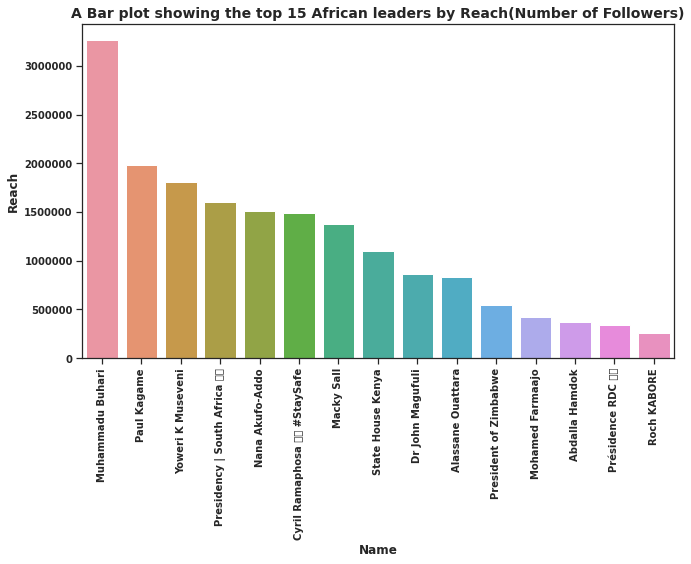

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(10,8))
chart = sns.barplot(x="name", y="reach", data=df_gov_rank[:15])
plt.xticks(fontsize = 10, fontweight='bold')
plt.yticks(fontsize = 10,fontweight='bold')
plt.title("A Bar plot showing the top 15 African leaders by Reach(Number of Followers)", fontsize = 14, fontweight= "bold" )
plt.xlabel("Name",fontsize = 12, fontweight= "bold")
plt.ylabel("Reach",fontsize = 12, fontweight= "bold", fontfamily="sans-serif")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_leader_reach44.jpeg');

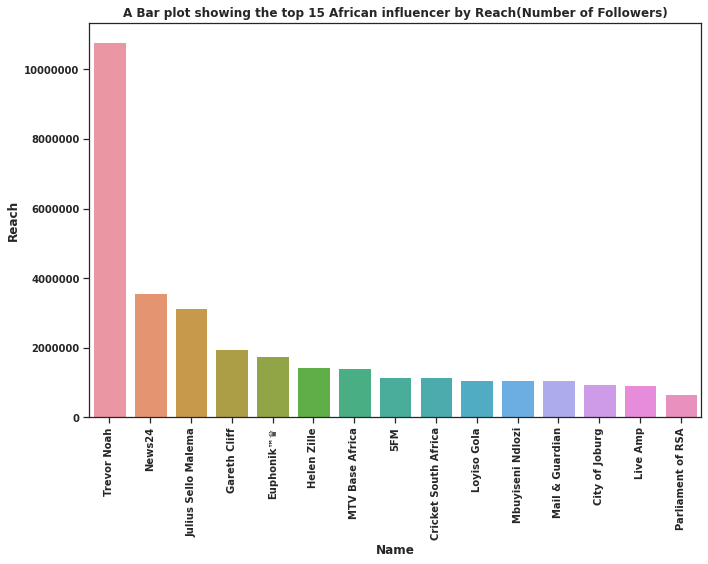

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(10,8))
chart = sns.barplot(x="name", y="reach", data=df_infl_rank[:15])
plt.title("A Bar plot showing the top 15 African influencer by Reach(Number of Followers)",fontsize = 12, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold")
plt.xlabel("Name",fontsize = 12, fontweight= "bold")
plt.ylabel("Reach",fontsize = 12, fontweight= "bold")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_infl_reach.jpeg');

### Cleaning and recovering the rank by number of retweets and likes

In [ ]:
#since i didn't get all the tweets for each of them,  i focused on the sum of the top 100 tweets in the dataset 

In [ ]:
#then i grouped tweet by author and sort them, then took only the top 100 retweets and like for each
#i sorted first by like because it is easier to get likes and those two work hand in hand
df_infl_popl = df_infl.sort_values(['favorite_count', 'retweet_count'], ascending=False).groupby('name').head(100)
df_gov_popl = df_gov.sort_values(['favorite_count', 'retweet_count'], ascending=False).groupby('name').head(100)

In [ ]:
#Then i took only the columns that were important in this popularity analysis which is retweet and like
df_infl_popl = df_infl_popl[["name", "retweet_count", "favorite_count"]]
df_gov_popl = df_gov_popl[["name", "retweet_count", "favorite_count"]]

In [ ]:
df_infl_popl = df_infl_popl.groupby(['name']).sum()
df_gov_popl = df_gov_popl.groupby(['name']).sum()


In [ ]:
df_infl_popl= df_infl_popl.sort_values(["favorite_count", "retweet_count"], ascending=False).reset_index()
df_gov_popl= df_gov_popl.sort_values(["favorite_count", "retweet_count"], ascending=False).reset_index()

In [ ]:
df_infl_popl["popularity"] = df_infl_popl['retweet_count'] + df_infl_popl["favorite_count"]
df_gov_popl["popularity"] = df_gov_popl['retweet_count'] + df_gov_popl["favorite_count"]

In [ ]:
#here i sorted the values by popularity 
df_infl_popl =df_infl_popl.sort_values(["popularity"], ascending=False).reset_index(drop=True)
df_gov_popl =df_gov_popl.sort_values(["popularity"], ascending=False).reset_index(drop=True)

In [ ]:
#here i did the ranking for both datasets 
df_infl_popl["Rank: By Popularity"] = df_infl_popl['popularity'].rank(ascending=False)
df_gov_popl["Rank: By Popularity"] = df_gov_popl['popularity'].rank(ascending=False)

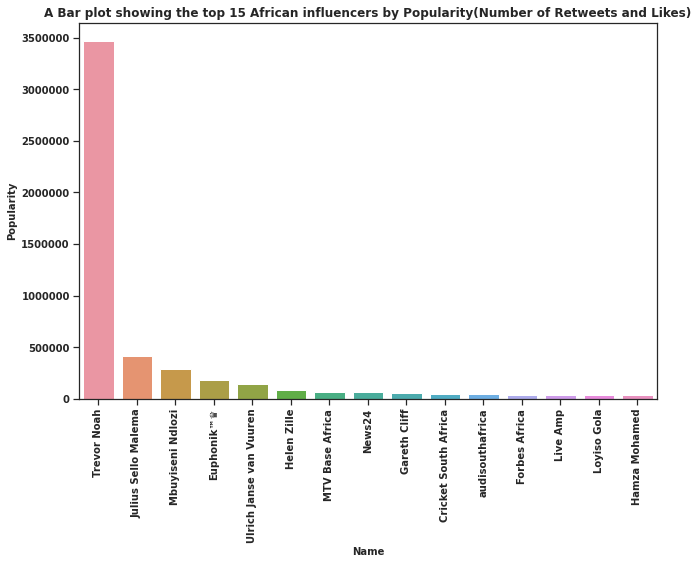

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(10,8))
chart = sns.barplot(x="name", y="popularity", data=df_infl_popl[:15])
plt.title("A Bar plot showing the top 15 African influencers by Popularity(Number of Retweets and Likes)", fontsize = 12, fontweight= "bold" )
plt.xlabel("Name",fontsize = 10, fontweight= "bold")
plt.ylabel("Popularity", fontsize = 10, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_infl_popl.jpeg');

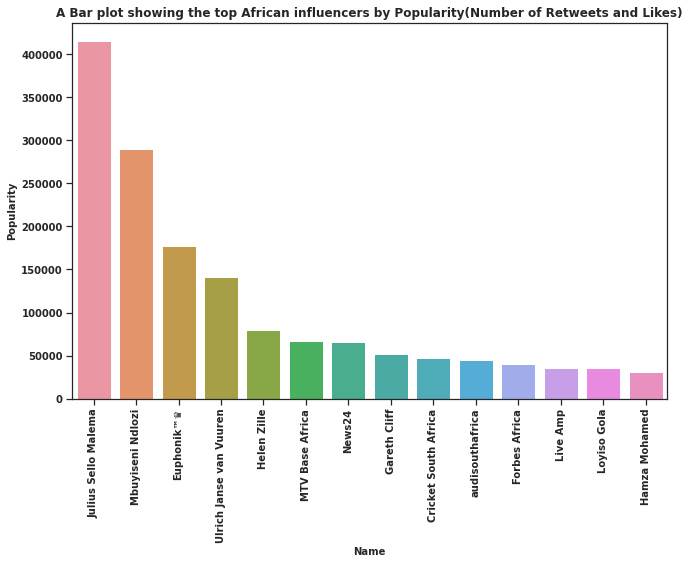

In [ ]:
#plot without Trevor Noah
sns.set(style='ticks')
plt.figure(figsize=(10,8))
chart = sns.barplot(x="name", y="popularity", data=df_infl_popl[1:15])
plt.title("A Bar plot showing the top African influencers by Popularity(Number of Retweets and Likes)", fontsize = 12, fontweight= "bold" )
plt.xlabel("Name",fontsize = 10, fontweight= "bold")
plt.ylabel("Popularity", fontsize = 10, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_infl_popl2.jpeg');

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127462 missing from current font.
  font.

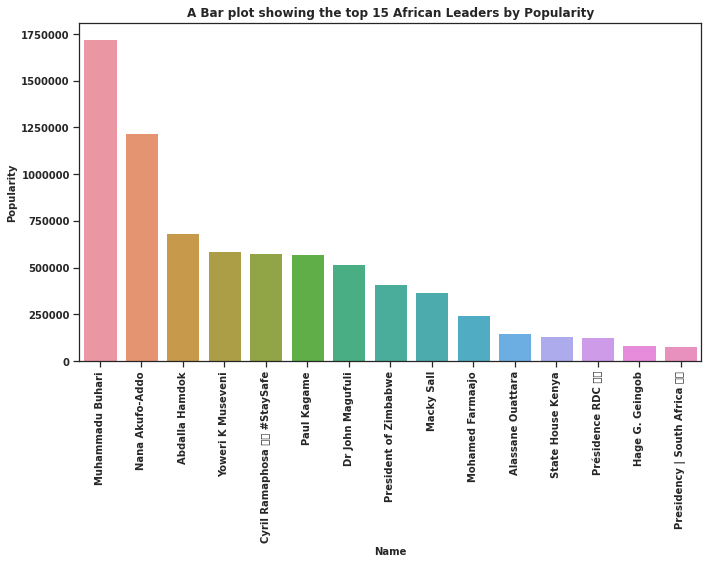

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(10,8))
chart = sns.barplot(x="name", y="popularity", data=df_gov_popl[:15])
plt.title("A Bar plot showing the top 15 African Leaders by Popularity", fontsize = 12, fontweight= "bold" )
plt.xlabel("Name", fontsize = 10, fontweight= "bold")
plt.ylabel("Popularity", fontsize = 10, fontweight= "bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_leader_popularity.jpeg');

In [ ]:
df_gov_popl.head()

,name,retweet_count,favorite_count,popularity,Rank: By Popularity
0,Muhammadu Buhari,289700,1434788,1724488,1.0
1,Nana Akufo-Addo,205035,1015494,1220529,2.0
2,Abdalla Hamdok,121221,562380,683601,3.0
3,Yoweri K Museveni,92523,496708,589231,4.0
4,Cyril Ramaphosa 🇿🇦 #StaySafe,93073,485854,578927,5.0


### Extract the top mentions 

In [ ]:
#i created a new dataframe for mentions
df_mentions = df_infl['mention'].str.split(',', expand=True).rename(columns = lambda x: "string"+str(x+1))
df2_mention = df_gov['mention'].str.split(',', expand=True).rename(columns = lambda x: "string"+str(x+1))

In [ ]:
#i melted all the values to a column since they are the same thing
new = pd.melt(df_mentions)
new2 = pd.melt(df2_mention)
#i dropped all null values
new = new.dropna(subset=['value'])
new2 = new2.dropna(subset=['value'])
#here i grouped by the number of time a value appeared
new = new.groupby('value').count().reset_index()
new2 = new2.groupby('value').count().reset_index()

In [ ]:
#i did this to sort all the values in my data by number of mentions
new.sort_values(by='variable', ascending=False, inplace=True)
new2.sort_values(by='variable', ascending=False, inplace=True)

In [ ]:
new.reset_index(drop=True, inplace=True)
new2.reset_index(drop=True, inplace=True)

In [ ]:
#i created a list of all the accounts in my original dataset
names = list(df_new_infl['original_author'])
names2 = list(df_new_gov['original_author'])
#i used this to only get mentions of users in our influencers list which is the 
#scope of this project
mentions_infl =new[new['value'].isin(names)]
mentions_gov = new2[new2['value'].isin(names2)]
#i had to reset the index because a lot of rows were dropped
mentions_infl =mentions_infl.reset_index(drop=True)
mentions_gov = mentions_gov.reset_index(drop=True)
#i wanted the columns to have an understandable name 
mentions_infl=mentions_infl.rename(columns={'value' :'original_author',"variable": 'Count'})
mentions_gov=mentions_gov.rename(columns={'value' :'original_author',"variable": 'Count'})

In [ ]:
mention_names =list(mentions_infl['original_author']) 
mention_names_gov = list(mentions_gov["original_author"])

In [ ]:
df2 = pd.DataFrame({"original_author": mention_names,"Count":[0] * len(mention_names)}) 
df3= pd.DataFrame({"original_author": mention_names_gov, "Count": [0] * len(mention_names_gov)})
# for appending df2 at the end of df1 
mentions_infl =mentions_infl.append(df2, ignore_index=True) 
mentions_gov= mentions_gov.append(df3, ignore_index=True)

In [ ]:
mentions_gov["name"] = mentions_gov['original_author'].map(gov_name)
mentions_infl['name'] = mentions_infl['original_author'].map(infl_name)
column_names = ["original_author", "name", "Count"]

mentions_gov = mentions_gov.reindex(columns=column_names)
mentions_infl = mentions_infl.reindex(columns=column_names)

In [ ]:
#here i did the ranking for both datasets 
mentions_infl["Rank: By Number of Mentions"] = mentions_infl['Count'].rank(ascending=False)
mentions_gov["Rank: By Number of Mentions"] = mentions_gov['Count'].rank(ascending=False)

In [ ]:
mentions_gov.head()

,original_author,name,Count,Rank: By Number of Mentions
0,CyrilRamaphosa,Cyril Ramaphosa 🇿🇦 #StaySafe,190,1.0
1,Macky_Sall,Macky Sall,114,2.0
2,MagufuliJP,Dr John Magufuli,108,3.0
3,mohzambia,Ministry of Health Zambia,74,4.0
4,UNZambia,UN Zambia,55,5.0


In [ ]:
mentions_infl.head()

,original_author,name,Count,Rank: By Number of Mentions
0,_AfricanUnion,African Union,96,1.0
1,AfricaCheck,Africa Check,33,2.0
2,TheStar_news,The Star,27,3.0
3,TheAfricaReport,The Africa Report,20,4.0
4,News24,News24,16,5.0


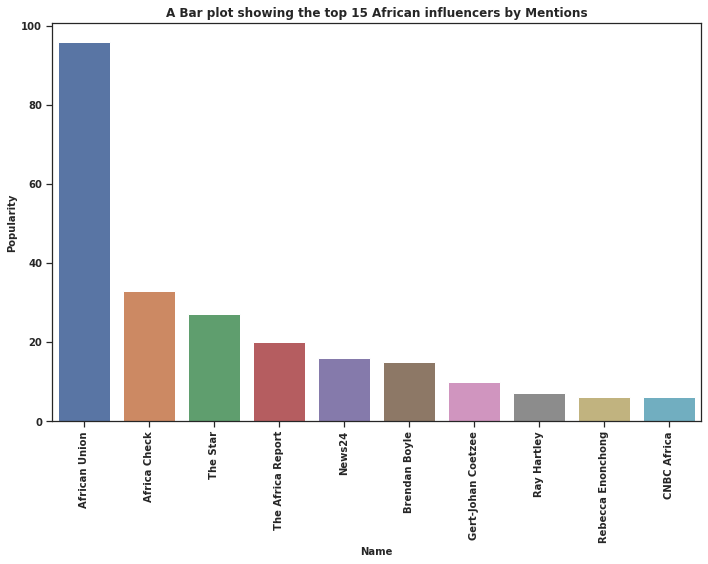

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(10,8))
chart = sns.barplot(x="name", y="Count", data=mentions_infl[:10])
plt.title("A Bar plot showing the top 15 African influencers by Mentions", fontsize= 12, fontweight="bold")
plt.xlabel("Name", fontsize= 10, fontweight="bold")
plt.ylabel("Popularity",fontsize= 10, fontweight="bold")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_infl_mentions.png');

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127462 missing from current font.
  font.

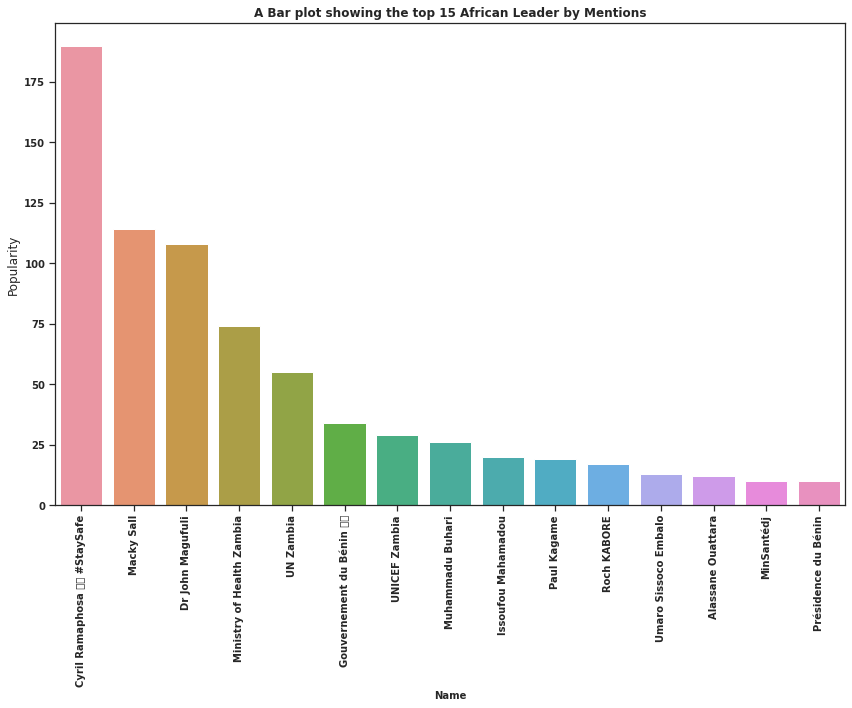

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(12,10))
chart = sns.barplot(x="name", y="Count", data=mentions_gov[:15])
plt.title("A Bar plot showing the top 15 African Leader by Mentions",  fontsize= 12, fontweight="bold")
plt.xlabel("Name", fontsize= 10, fontweight="bold")
plt.ylabel("Popularity")
plt.xticks(fontsize = 10, fontweight= "bold")
plt.yticks(fontsize = 10, fontweight= "bold", fontfamily='sans-serif')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/african_gov_mentions.jpeg');

### Extract the top 5 unique hashtags these influencers and government officials used in their top 10 retweets.  Group them based on their top 5 hashtags similarities. 

In [ ]:
#i want to start start with recovering the top ten retweets, 
#this signifies what their followers accept and support tells us a little bit about their audience 

In [ ]:
#i would start from retrieving their top ten retweets for each 
#of the influencers and government official
#this code will first group the objects by name then sort all the values 
#by the number of retweets, then finally retrieve the first 10 rows for our use
df_infl_retweet = df_infl.sort_values(['retweet_count'], ascending=False).groupby('name').head(10)
df_gov_retweet = df_gov.sort_values(['retweet_count'], ascending=False).groupby('name').head(10)

In [ ]:
#this would create a new column for each new string of hashtags 
top_ten_hashtags_infl = df_infl_retweet['hashtags'].str.split(',', expand=True).rename(columns = lambda x: "hashtag"+str(x+1))
top_ten_hashtags_gov = df_gov_retweet['hashtags'].str.split(',', expand=True).rename(columns = lambda x: "hashtag"+str(x+1))

In [ ]:
top_ten_hashtags_infl['original_author'] = df_infl_retweet['original_author']
top_ten_hashtags_gov['original_author'] = df_gov_retweet['original_author']


In [ ]:
top_ten_hashtags_gov.dropna(thresh=2, inplace=True)
top_ten_hashtags_infl.dropna(thresh=2, inplace=True)

In [ ]:
top_ten_hashtags_gov =top_ten_hashtags_gov.melt(id_vars='original_author')
top_ten_hashtags_infl= top_ten_hashtags_infl.melt(id_vars='original_author')

In [ ]:
# i dropped all the null values, those without hashtags
gov = top_ten_hashtags_gov.dropna()
infl = top_ten_hashtags_infl.dropna()
infl['value'] = infl["value"].str.lower()
gov['value'] = gov['value'].str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
infl['value'] = infl['value'].str.replace(" ","")
gov['value'] = gov['value'].str.replace(" ","")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
infl= infl.drop(columns='variable')
gov = gov.drop(columns='variable')

In [ ]:
hashtags_onehot = pd.get_dummies(infl[['value']], prefix="", prefix_sep="")
hashtags_gov_onehot = pd.get_dummies(gov[['value']], prefix="", prefix_sep="")


In [ ]:
hashtags_onehot
# add original author column back to dataframe
hashtags_onehot['original_author'] = infl['original_author'] 
hashtags_gov_onehot['original_author'] = gov['original_author']
# move original author column to the first column
fixed_columns = [hashtags_onehot.columns[-1]] + list(hashtags_onehot.columns[:-1])
hashtags_onehot = hashtags_onehot[fixed_columns]
fixed_columns2 = [hashtags_gov_onehot.columns[-1]] + list(hashtags_gov_onehot.columns[:-1])
hashtags_gov_onehot = hashtags_gov_onehot[fixed_columns2]


In [ ]:
#i grouped then and measure by the mean of the hashtags
hashtags_grouped = hashtags_onehot.groupby('original_author').mean().reset_index()
hashtags_gov_grouped = hashtags_gov_onehot.groupby('original_author').mean().reset_index()

In [ ]:
hashtags_grouped.replace(0, np.nan, inplace=True)
hashtags_gov_grouped.replace(0, np.nan, inplace=True)

In [ ]:
for hashtag in hashtags_grouped['original_author']:
    print("----"+hashtag+"----")
    temp = hashtags_grouped[hashtags_grouped['original_author'] == hashtag].T.reset_index()
    temp.columns = ['hashtag','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(5))
    print('\n')

----5FM----
            hashtag  freq
0        alcoholban  0.25
1   day98oflockdown  0.25
2      goodemorning  0.25
3  newmusicthursday  0.25
4           2019ggs   NaN


----AfricaCheck----
       hashtag  freq
0  southafrica   0.3
1        kenya   0.2
2        china   0.1
3      covid19   0.1
4     magufuli   0.1


----AfricaResearch----
     hashtag  freq
0    nigeria  0.38
1      kenya  0.25
2  bokoharam  0.12
3       land  0.12
4   zimbabwe  0.12


----Aynte----
        hashtag  freq
0         kenya  0.25
1       somalia  0.25
2        africa  0.12
3       covid19  0.12
4  democracyday  0.12


----BobSkinstad----
         hashtag  freq
0           fmgr   1.0
1        2019ggs   NaN
2   28thausummit   NaN
3  30daysofgreen   NaN
4        33lions   NaN


----BrendanSAfrica----
         hashtag  freq
0          media   1.0
1        2019ggs   NaN
2   28thausummit   NaN
3  30daysofgreen   NaN
4        33lions   NaN


----Camfed----
               hashtag  freq
0              covid19  0.17

In [ ]:
for hashtag in hashtags_gov_grouped['original_author']:
    print("----"+hashtag+"----")
    temp = hashtags_gov_grouped[hashtags_gov_grouped['original_author'] == hashtag].T.reset_index()
    temp.columns = ['hashtag','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(7))
    print('\n')

----AOuattara_PRCI----
              hashtag  freq
0         coronavirus   0.5
1             covid19   0.5
2           africaday   NaN
3             afrique   NaN
4           argentina   NaN
5  benjaminhounkpatin   NaN
6              bissau   NaN


----CyrilRamaphosa----
                  hashtag  freq
0  nationalcommandcouncil   0.5
1            webbelliscup   0.5
2               africaday   NaN
3                 afrique   NaN
4               argentina   NaN
5      benjaminhounkpatin   NaN
6                  bissau   NaN


----EswatiniGovern1----
              hashtag  freq
0             covid19   0.8
1           africaday   0.2
2             afrique   NaN
3           argentina   NaN
4  benjaminhounkpatin   NaN
5              bissau   NaN
6          budget2020   NaN


----FinanceSC----
                hashtag  freq
0               covid19  0.31
1            seychelles  0.31
2                 fa4jr  0.23
3            budget2020  0.08
4  intellectualproperty  0.08
5             africada